Food Delivery Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('All libraries imported successfully')

All libraries imported successfully


Step 1: Load CSV Data

In [2]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non-null  int64  
 3   order_date       10000 non-null  object 
 4   total_amount     10000 non-null  float64
 5   restaurant_name  10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


Step 2: Load JSON Data

In [5]:
users = pd.read_json('users.json')
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3000 non-null   int64 
 1   name        3000 non-null   object
 2   city        3000 non-null   object
 3   membership  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


Step 3: Load SQL Data

In [11]:
import sqlite3

conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

with open('restaurants.sql',"r") as file:
    sql_script = file.read()

cursor.executescript(sql_script)

In [15]:
pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type= 'table';",
     conn
)

restaurants = pd.read_sql_query(
    "SELECT * FROM restaurants",
     conn
)

restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [16]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_id    500 non-null    int64  
 1   restaurant_name  500 non-null    object 
 2   cuisine          500 non-null    object 
 3   rating           500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Step 4: Merge The Data

In [17]:
orders_users = orders.merge(
    users,
    on='user_id',
    how='left'
)

orders_users.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


Merge with Restaurants

In [19]:
df = orders_users.merge(
    restaurants,
    on= 'restaurant_id',
    how='left'
)

df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


Saving the Final Dataset

In [21]:
df.to_csv('Final_food_delivery_dataset.csv', index=False)

# Final Dataset Analysis

1. Order Trends over Time

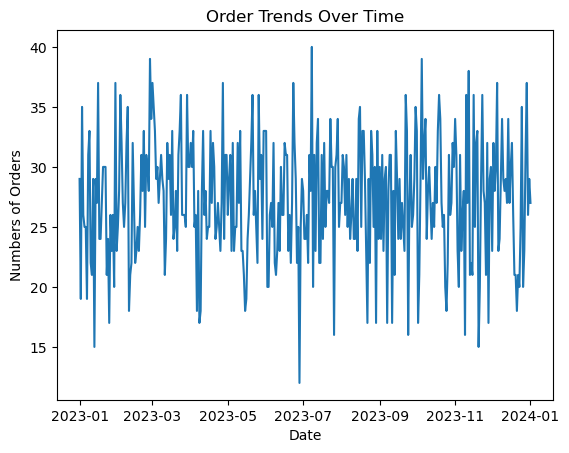

In [24]:
df['order_date'] = pd.to_datetime(df['order_date'])

orders_trend = df.groupby(
    df['order_date'].dt.date
).size()

orders_trend.plot()
plt.title('Order Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Numbers of Orders')
plt.show()

The line chart shows how the number of orders changes on a daily basis over time. There are regular ups and downs in the order count, which is expected as customer demand varies from day to day.

2. User Behavior Patterns

In [25]:
df['user_id'].value_counts().head()

user_id
2973    13
1515    12
1337    11
496     11
874     11
Name: count, dtype: int64

3. City-wise Performance

In [27]:
df.groupby('city').size().sort_values(ascending = False)

city
Bangalore    2751
Chennai      2469
Pune         2430
Hyderabad    2350
dtype: int64

 Cuisine-wise Performance

In [28]:
df.groupby('cuisine').size().sort_values(ascending=False)

cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
dtype: int64

4. Membership impact

In [32]:
df.groupby('membership')['total_amount'].mean()

membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

5. Revenue distribution and seasonality

In [33]:
df['month'] = df['order_date'].dt.month
df.groupby('month')['total_amount'].sum()

month
1     663020.26
2     630867.40
3     716738.98
4     666097.18
5     668428.61
6     610822.93
7     688559.45
8     694987.58
9     653838.07
10    699187.73
11    637772.43
12    681303.50
Name: total_amount, dtype: float64

MCQ Analysis

1. Which city has the highest total revenue (total_amount) from Gold members?  

In [39]:
#Filtering gold memeber

gold_df = df[df['membership'] == 'Gold']
gold_city_revenue = gold_df.groupby('city')['total_amount'].sum()
gold_city_revenue.sort_values(ascending= False)

city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [37]:
gold_city_revenue.idxmax()

'Chennai'

2. Which cuisine has the highest average order value across all orders?

In [41]:
#Cuisine-wise average order value
cuisine_avg_order = df.groupby('cuisine')['total_amount'].mean()

cuisine_avg_order.sort_values(ascending = False)

cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

3. How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?

In [44]:
user_total_spend = df.groupby('user_id')['total_amount'].sum()
high_spending_users = user_total_spend[user_total_spend > 1000]

high_spending_users.count()


np.int64(2544)

4. Which restaurant rating range generated the highest total revenue?

In [45]:
df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating', 'month'],
      dtype='object')

In [53]:
rating_revenue = df.groupby('rating')['total_amount'].sum()
rating_revenue.sort_values(ascending=False)


rating
4.8    657707.71
4.6    495867.97
3.2    490913.01
4.5    479047.03
4.9    467467.09
3.8    466878.69
3.1    443863.92
4.2    423185.06
4.7    416301.51
4.1    380850.85
3.7    368173.17
4.4    346276.90
3.4    339942.79
4.3    330966.42
3.5    318822.05
4.0    318261.42
3.9    299987.19
3.3    288212.80
3.6    264193.94
3.0    255018.13
5.0    159686.47
Name: total_amount, dtype: float64

5. Among Gold members, which city has the highest average order value?

In [55]:
gold_df = df[df['membership'] == 'Gold']

gold_city_avg = gold_df.groupby('city')['total_amount'].mean()
gold_city_avg.sort_values(ascending=False)

city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

6. Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?

In [56]:
cuisine_distinct_restaurants = df.groupby('cuisine').agg(
    restaurants_count = ('restaurant_id','nunique'),
    total_revenue=('total_amount', 'sum')
)

cuisine_distinct_restaurants

,restaurants_count,total_revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


7. What percentage of total orders were placed by Gold members? (Rounded to nearest integer

In [58]:
total_orders = df.shape[0]
total_orders


10000

In [60]:
gold_orders = df[df['membership']=='Gold'].shape[0]

gold_order_percentage = (gold_orders/total_orders)*100
gold_order_percentage

49.87

8. Which restaurant has the highest average order value but less than 20 total orders?

In [74]:
df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating', 'month'],
      dtype='object')

In [78]:
mcq_restaurants = [
    "Grand Cafe Punjabi",
    "Grand Restaurant South Indian",
    "Ruchi Mess Multicuisine",
    "Ruchi Foods Chinese"
]
mcq_df = df[
    df['restaurant_name_x'].isin(mcq_restaurants)
]
mcq_stats = mcq_df.groupby('restaurant_name_x').agg(
    order_count=('order_id', 'count'),
    avg_order_value=('total_amount', 'mean')
)

mcq_filtered = mcq_stats[mcq_stats['order_count'] < 20]

mcq_filtered.sort_values(by='avg_order_value', ascending=False)




,order_count,avg_order_value
restaurant_name_x,,
Ruchi Foods Chinese,19,686.603158


9. Which combination contributes the highest revenue?

In [79]:
df.groupby(['membership', 'cuisine'])['total_amount'].sum().loc[
    [
    ('Gold', 'Indian'),
    ('Gold', 'Italian'),
    ('Regular','Indian'),
    ('Regular','Chinese')
    ]
].sort_values(ascending=False)


membership  cuisine
Gold        Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

10. During which quarter of the year is the total revenue highest?

In [80]:
df['quarter']= df['order_date'].dt.to_period('Q')
df.groupby('quarter')['total_amount'].sum().sort_values(ascending=False)

quarter
2023Q3    2037385.10
2023Q4    2018263.66
2023Q1    1993425.14
2023Q2    1945348.72
2024Q1      17201.50
Freq: Q-DEC, Name: total_amount, dtype: float64

11. How many total orders were placed by users with Gold membership?

In [81]:
gold_order_count = df[df['membership']== 'Gold'].shape[0]
gold_order_count

4987

12. What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?

In [83]:
total_revenue = df[df['city'] == 'Hyderabad']['total_amount'].sum()
round(total_revenue)

1889367

13. How many distinct users placed at least one order?

In [84]:
df['user_id'].nunique()

2883

14. What is the average order value (rounded to 2 decimals) for Gold members?


In [87]:
gold_avg_value = df[df['membership'] == 'Gold']['total_amount'].mean()
round(gold_avg_value, 2)

np.float64(797.15)

15. How many orders were placed for restaurants with rating ≥ 4.5?

In [88]:
high_ratings = df[df['rating'] >= 4.5]
high_ratings.shape[0]

3374

16. How many orders were placed in the top revenue city among Gold members only?

In [89]:
gold_df = df[df['membership'] == 'Gold']

In [90]:
gold_city_revenue = gold_df.groupby('city')['total_amount'].sum()
top_city = gold_city_revenue.idxmax()
top_city

'Chennai'

In [91]:
gold_df[gold_df['city'] == 'Chennai'].shape[0]

1337

The total number of rows in the final merged dataset is _

In [92]:
df.shape[0]

10000